# M6_AG1_Clasificación de noticias (HuffPost)

Nieves Quispe y Felipe Maggi

27/06/2024

## Descripción de la tarea

**Contexto**

Este conjunto de datos contiene alrededor de 200.000 titulares de noticias del año 2012 al 2018 obtenidos de HuffPost. El modelo entrenado en este conjunto de datos podría usarse para identificar etiquetas de artículos de noticias sin seguimiento o para identificar el tipo de lenguaje utilizado en diferentes artículos de noticias.

Se trata de un documento JSON con las siguientes claves:

- **Category**: se trata de la categoría del artículo y es nuestra variable a estimar
- **Headline**: titular de la noticia del HuffPost
- **Authors**: autores de los artículos
- **Link**: url de la noticia
- **Short_description**: resumen del artículo
- **Date**: fecha del artículo

Con estos datos debes generar un modelo con el algoritmo de **Naive-Bayes** que consiga clasificar artículos atendiendo a sus titulares.

Se pide:

1. Modelo de clasificación multiclase que identifique las siguientes categorías: WELLNESS, PARENTING, TRAVEL, BUSINESS y SPORTS.
2. Realizar scrapping de títulos de artículos de la web en las temáticas de anteriores. Se piden más de 20 por categoría.
3. Aplicar el modelo correspondiente para comprobar cómo se comporta con artículos de hoy día.

**Consideraciones**:

El tema de scrapping-web se entiende dado en módulos anteriores.

Pasos acerca del modelo:

1. Lectura del archivo JSON y conversión a Pandas Dataframe
2. Realizar el tratamiento de textos vistos en el tema 3 de este módulo.
3. Aplicar NaiveBayes analizando diferentes valores de “Alpha”
4. Evaluar el modelo y comentar los resultados

Pasos acerca del webscrapping:

- Recoger más de 20 títulos de artículos de cada categoría (WELLNESS, PARENTING, TRAVEL, BUSINESS y SPORTS).
- Aplicarles TF-IDF Vectorizer.
- Realizar las predicciones con el modelo creado.
- Evaluar y comentar los resultados.

## Carga de paquetes y librerías

In [3]:
# Importar pandas y numpy
import pandas as pd
import numpy as np

# Importar json
import json

## Importación paquete Matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

## Importación Seaborn
import seaborn as sns

# Import math
import math

# Import sklearn
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics

# Import seaborn
import seaborn as sns

# Vectorización
# Stopwords
import nltk
nltk.download('stopwords')
from sklearn.feature_extraction.text import TfidfVectorizer

from nltk.corpus import stopwords
len(stopwords.words('english'))

# Scrapping
import requests
from bs4 import BeautifulSoup

# Desactivar todos los warnings
import warnings
warnings.filterwarnings("ignore")

# Configurar pandas para mostrar todas las columnas
pd.set_option('display.max_columns', None)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Lectura del archivo JSON y conversión a Pandas Dataframe

**MUY IMPORTANTE**

Para que el código siguiente se ejecute correctamente, es necesario especificar la ruta correcta en el directorio local. El archivo original en json es grande y no podemos en este caso subir el archivo a GitHub, puesto que supera los 25MB.

Si el notebook se ejecuta en *Colab*, es necesario subir el archivo cada vez que se reinicie el entorno, y la operación puede tardar varios minutos.

In [4]:
data = []
with open('act_grupal_News_Category_Dataset_v2.json', 'r') as file:
    for line in file:
        data.append(json.loads(line))

huffpost_completo = pd.DataFrame(data)
huffpost_completo.head()


category                                           headline  \
0          CRIME  There Were 2 Mass Shootings In Texas Last Week...   
1  ENTERTAINMENT  Will Smith Joins Diplo And Nicky Jam For The 2...   
2  ENTERTAINMENT    Hugh Grant Marries For The First Time At Age 57   
3  ENTERTAINMENT  Jim Carrey Blasts 'Castrato' Adam Schiff And D...   
4  ENTERTAINMENT  Julianna Margulies Uses Donald Trump Poop Bags...   

           authors                                               link  \
0  Melissa Jeltsen  https://www.huffingtonpost.com/entry/texas-ama...   
1    Andy McDonald  https://www.huffingtonpost.com/entry/will-smit...   
2       Ron Dicker  https://www.huffingtonpost.com/entry/hugh-gran...   
3       Ron Dicker  https://www.huffingtonpost.com/entry/jim-carre...   
4       Ron Dicker  https://www.huffingtonpost.com/entry/julianna-...   

                                   short_description        date  
0  She left her husband. He killed their children...  2018-05-26  
1                           Of course it has a song.  2018-05-26  
2  The actor and his longtime girlfriend Anna Ebe...  2018-05-26  
3  The actor gives Dems an ass-kicking for not fi...  2018-05-26  
4  The "Dietland" actress said using the bags is ...  2018-05-26

In [5]:
huffpost_completo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200853 entries, 0 to 200852
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   category           200853 non-null  object
 1   headline           200853 non-null  object
 2   authors            200853 non-null  object
 3   link               200853 non-null  object
 4   short_description  200853 non-null  object
 5   date               200853 non-null  object
dtypes: object(6)
memory usage: 9.2+ MB


## Revisión de datos

### Valores únicos de category

In [6]:
# Obtener la lista de valores únicos de la columna 'category'
unique_categories = huffpost_completo['category'].unique()

# Mostrar la lista de valores únicos
print(unique_categories)

['CRIME' 'ENTERTAINMENT' 'WORLD NEWS' 'IMPACT' 'POLITICS' 'WEIRD NEWS'
 'BLACK VOICES' 'WOMEN' 'COMEDY' 'QUEER VOICES' 'SPORTS' 'BUSINESS'
 'TRAVEL' 'MEDIA' 'TECH' 'RELIGION' 'SCIENCE' 'LATINO VOICES' 'EDUCATION'
 'COLLEGE' 'PARENTS' 'ARTS & CULTURE' 'STYLE' 'GREEN' 'TASTE'
 'HEALTHY LIVING' 'THE WORLDPOST' 'GOOD NEWS' 'WORLDPOST' 'FIFTY' 'ARTS'
 'WELLNESS' 'PARENTING' 'HOME & LIVING' 'STYLE & BEAUTY' 'DIVORCE'
 'WEDDINGS' 'FOOD & DRINK' 'MONEY' 'ENVIRONMENT' 'CULTURE & ARTS']


### Porcentaje de observaciones por categoría

In [7]:
# Contar las observaciones por categoría
category_counts = huffpost_completo['category'].value_counts()

# Calcular el porcentaje de observaciones para cada categoría
category_percentages = (category_counts / len(huffpost_completo)) * 100

# Crear un nuevo DataFrame con los resultados
category_percentage_df = pd.DataFrame({
    'category': category_percentages.index,
    'percentage': category_percentages.values
})

# Mostrar el DataFrame
print(category_percentage_df)


          category  percentage
0         POLITICS   16.299981
1         WELLNESS    8.875645
2    ENTERTAINMENT    7.994902
3           TRAVEL    4.922506
4   STYLE & BEAUTY    4.804011
5        PARENTING    4.320075
6   HEALTHY LIVING    3.332786
7     QUEER VOICES    3.143593
8     FOOD & DRINK    3.099779
9         BUSINESS    2.955893
10          COMEDY    2.576511
11          SPORTS    2.431629
12    BLACK VOICES    2.254385
13   HOME & LIVING    2.088592
14         PARENTS    1.969102
15   THE WORLDPOST    1.824220
16        WEDDINGS    1.817747
17           WOMEN    1.737589
18          IMPACT    1.722155
19         DIVORCE    1.705725
20           CRIME    1.695270
21           MEDIA    1.401523
22      WEIRD NEWS    1.329330
23           GREEN    1.305432
24       WORLDPOST    1.284024
25        RELIGION    1.272572
26           STYLE    1.122214
27         SCIENCE    1.084375
28      WORLD NEWS    1.083877
29           TASTE    1.043549
30            TECH    1.036579
31      

In [8]:
# Filtrar los resultados para las categorías deseadas
filtered_categories = ['WELLNESS', 'PARENTING', 'TRAVEL', 'BUSINESS', 'SPORTS']

filtered_category_percentage_df = category_percentage_df[category_percentage_df['category'].isin(filtered_categories)]

# Mostrar el DataFrame filtrado
print(filtered_category_percentage_df)

     category  percentage
1    WELLNESS    8.875645
3      TRAVEL    4.922506
5   PARENTING    4.320075
9    BUSINESS    2.955893
11     SPORTS    2.431629


## Creación de datframe filtrado, con las categorías de estudio

WELLNESS, PARENTING, TRAVEL, BUSINESS y SPORTS.


In [9]:
huffpost_df = huffpost_completo[huffpost_completo['category'].isin(filtered_categories)]

# Mostrar las primeras filas del DataFrame filtrado
huffpost_df.head()

category                                           headline  \
80     SPORTS  Jets Chairman Christopher Johnson Won't Fine P...   
87   BUSINESS  U.S. Launches Auto Import Probe, China Vows To...   
101    SPORTS      Trump Posthumously Pardons Boxer Jack Johnson   
126    TRAVEL  14 Ways To Make Family Road Trips Easier, From...   
135    SPORTS  Anna Kournikova Dancing With Her Bouncing Baby...   

                                      authors  \
80                                 Ron Dicker   
87   David Shepardson and Jeff Mason, Reuters   
101                            Lydia O'Connor   
126                            Taylor Pittman   
135                                Ron Dicker   

                                                  link  \
80   https://www.huffingtonpost.com/entry/jets-chri...   
87   https://www.huffingtonpost.com/entry/trump-aut...   
101  https://www.huffingtonpost.com/entry/trump-par...   
126  https://www.huffingtonpost.com/entry/family-ro...   
135  https://www.huffingtonpost.com/entry/anna-kour...   

                                     short_description        date  
80   “I never want to put restrictions on the speec...  2018-05-24  
87   The investigation could lead to new U.S. tarif...  2018-05-24  
101  The pardoning of the black heavyweight boxer i...  2018-05-24  
126  Having waterproof covers on the seats is kind ...  2018-05-24  
135                            The score is love-love.  2018-05-24

In [10]:
# Mostrar información del DataFrame filtrado para verificar la estructura
huffpost_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47212 entries, 80 to 200852
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   category           47212 non-null  object
 1   headline           47212 non-null  object
 2   authors            47212 non-null  object
 3   link               47212 non-null  object
 4   short_description  47212 non-null  object
 5   date               47212 non-null  object
dtypes: object(6)
memory usage: 3.5+ MB


In [11]:
# Contar las observaciones por categoría
category_counts = huffpost_df['category'].value_counts()

# Calcular el porcentaje de observaciones para cada categoría
category_percentages = (category_counts / len(huffpost_completo)) * 100

# Crear un nuevo DataFrame con los resultados
category_percentage_df = pd.DataFrame({
    'category': category_percentages.index,
    'percentage': category_percentages.values
})

# Mostrar el DataFrame
print(category_percentage_df)

    category  percentage
0   WELLNESS    8.875645
1     TRAVEL    4.922506
2  PARENTING    4.320075
3   BUSINESS    2.955893
4     SPORTS    2.431629


In [12]:
# Contar las observaciones por categoría
category_counts = huffpost_df['category'].value_counts()

# Calcular el porcentaje de observaciones para cada categoría
category_percentages = (category_counts / len(huffpost_df)) * 100

# Crear un nuevo DataFrame con los resultados
category_percentage_df = pd.DataFrame({
    'category': category_percentages.index,
    'percentage': category_percentages.values
})

# Mostrar el DataFrame
print(category_percentage_df)

    category  percentage
0   WELLNESS   37.759468
1     TRAVEL   20.941710
2  PARENTING   18.378802
3   BUSINESS   12.575193
4     SPORTS   10.344828


#### Previsualización de titulares

Previsualizamos algunos de los titulares de nuestro conjunto de datos, contenidos en el campo **headline**:

In [13]:
huffpost_df["headline"].values

array(["Jets Chairman Christopher Johnson Won't Fine Players For Anthem Protests",
       'U.S. Launches Auto Import Probe, China Vows To Defend Its Interests',
       'Trump Posthumously Pardons Boxer Jack Johnson', ...,
       'Giants Over Patriots, Jets Over Colts Among  Most Improbable Super Bowl Upsets Of All Time (VIDEOS)',
       'Aldon Smith Arrested: 49ers Linebacker Busted For DUI',
       'Dwight Howard Rips Teammates After Magic Loss To Hornets'],
      dtype=object)

## Conversión de categorías a variable numérica

In [14]:
label_encoder = LabelEncoder()
huffpost_df['category_encoded'] = label_encoder.fit_transform(huffpost_df['category'])
huffpost_df.head()

category                                           headline  \
80     SPORTS  Jets Chairman Christopher Johnson Won't Fine P...   
87   BUSINESS  U.S. Launches Auto Import Probe, China Vows To...   
101    SPORTS      Trump Posthumously Pardons Boxer Jack Johnson   
126    TRAVEL  14 Ways To Make Family Road Trips Easier, From...   
135    SPORTS  Anna Kournikova Dancing With Her Bouncing Baby...   

                                      authors  \
80                                 Ron Dicker   
87   David Shepardson and Jeff Mason, Reuters   
101                            Lydia O'Connor   
126                            Taylor Pittman   
135                                Ron Dicker   

                                                  link  \
80   https://www.huffingtonpost.com/entry/jets-chri...   
87   https://www.huffingtonpost.com/entry/trump-aut...   
101  https://www.huffingtonpost.com/entry/trump-par...   
126  https://www.huffingtonpost.com/entry/family-ro...   
135  https://www.huffingtonpost.com/entry/anna-kour...   

                                     short_description        date  \
80   “I never want to put restrictions on the speec...  2018-05-24   
87   The investigation could lead to new U.S. tarif...  2018-05-24   
101  The pardoning of the black heavyweight boxer i...  2018-05-24   
126  Having waterproof covers on the seats is kind ...  2018-05-24   
135                            The score is love-love.  2018-05-24   

     category_encoded  
80                  2  
87                  0  
101                 2  
126                 3  
135                 2

### Revisión de tabla categoría y codificación numérica

In [15]:
# Selecciona las columnas 'category' y 'category_encoded', elimina duplicados y resetea el índice
category_df = huffpost_df[['category', 'category_encoded']].drop_duplicates().reset_index(drop=True)

# Ordena el DataFrame por 'category_encoded' de menor a mayor
category_df = category_df.sort_values(by='category_encoded')

# Muestra el DataFrame ordenado
category_df


category  category_encoded
1   BUSINESS                 0
4  PARENTING                 1
0     SPORTS                 2
2     TRAVEL                 3
3   WELLNESS                 4

## Vectorización



### Vectorización de titulares

In [16]:
vectorizer = TfidfVectorizer(stop_words=stopwords.words('english'))
vect = vectorizer.fit_transform(huffpost_df["headline"].values)

In [17]:
vect.todense()
vocab = np.sort(list(vectorizer.vocabulary_.keys()))
huffpost_vect = pd.DataFrame(vect.todense(), columns = vocab)
print(huffpost_vect.shape)
huffpost_vect.head()

(47212, 26770)


00  000  000th  007   01  012  013  014   02  080  083   10  100  1000  \
0  0.0  0.0    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0   
1  0.0  0.0    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0   
2  0.0  0.0    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0   
3  0.0  0.0    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0   
4  0.0  0.0    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0   

   100k  100plus  100th  101  102  103  103rd  104  105  106  107  108  109  \
0   0.0      0.0    0.0  0.0  0.0  0.0    0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1   0.0      0.0    0.0  0.0  0.0  0.0    0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2   0.0      0.0    0.0  0.0  0.0  0.0    0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3   0.0      0.0    0.0  0.0  0.0  0.0    0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4   0.0      0.0    0.0  0.0  0.0  0.0    0.0  0.0  0.0  0.0  0.0  0.0  0.0   

   10a  10k  10th  10x   11  110  111  112  114  115  116  117  118   12  120  \
0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

   1200  121  122  123  124  125  125th  127  128  129  12th   13  130  132  \
0   0.0  0.0  0.0  0.0  0.0  0.0    0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0   
1   0.0  0.0  0.0  0.0  0.0  0.0    0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0   
2   0.0  0.0  0.0  0.0  0.0  0.0    0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0   
3   0.0  0.0  0.0  0.0  0.0  0.0    0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0   
4   0.0  0.0  0.0  0.0  0.0  0.0    0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0   

   133  134  135  136  13th        14  140  142  143  147  148  14th   15  \
0  0.0  0.0  0.0  0.0   0.0  0.000000  0.0  0.0  0.0  0.0  0.0   0.0  0.0   
1  0.0  0.0  0.0  0.0   0.0  0.000000  0.0  0.0  0.0  0.0  0.0   0.0  0.0   
2  0.0  0.0  0.0  0.0   0.0  0.000000  0.0  0.0  0.0  0.0  0.0   0.0  0.0   
3  0.0  0.0  0.0  0.0   0.0  0.392429  0.0  0.0  0.0  0.0  0.0   0.0  0.0   
4  0.0  0.0  0.0  0.0   0.0  0.000000  0.0  0.0  0.0  0.0  0.0   0.0  0.0   

   150  1500  150th  151  152  155  156  158  15s  15th   16  160  1600  160k  \
0  0.0   0.0    0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0   0.0   0.0   
1  0.0   0.0    0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0   0.0   0.0   
2  0.0   0.0    0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0   0.0   0.0   
3  0.0   0.0    0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0   0.0   0.0   
4  0.0   0.0    0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0   0.0   0.0   

   161  162  163  164  165  166th  168  16c  16th   17  170  1700s  173  174  \
0  0.0  0.0  0.0  0.0  0.0    0.0  0.0  0.0   0.0  0.0  0.0    0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0    0.0  0.0  0.0   0.0  0.0  0.0    0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0    0.0  0.0  0.0   0.0  0.0  0.0    0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0    0.0  0.0  0.0   0.0  0.0  0.0    0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0    0.0  0.0  0.0   0.0  0.0  0.0    0.0  0.0  0.0   

   175  1776  1799  17k  17th   18  180  1800  1800s  181  1812  182  183  \
0  0.0   0.0   0.0  0.0   0.0  0.0  0.0   0.0    0.0  0.0   0.0  0.0  0.0   
1  0.0   0.0   0.0  0.0   0.0  0.0  0.0   0.0    0.0  0.0   0.0  0.0  0.0   
2  0.0   0.0   0.0  0.0   0.0  0.0  0.0   0.0    0.0  0.0   0.0  0.0  0.0   
3  0.0   0.0   0.0  0.0   0.0  0.0  0.0   0.0    0.0  0.0   0.0  0.0  0.0   
4  0.0   0.0   0.0  0.0   0.0  0.0  0.0   0.0    0.0  0.0   0.0  0.0  0.0   

   184  185  1870s  1880  189  18th   19  190  1900  1908  1911  1930s  1932  \
0  0.0  0.0    0.0   0.0  0.0   0.0  0.0  0.0   0.0   0.0   0.0    0.0   0.0   
1  0.0  0.0    0.0   0.0  0.0   0.0  0.0  0.

In [18]:
huffpost_vect.max(axis=1)

0        0.421677
1        0.403366
2        0.493686
3        0.439682
4        0.476555
           ...   
47207    0.492960
47208    0.411799
47209    0.396692
47210    0.423291
47211    0.434877
Length: 47212, dtype: float64

In [19]:
huffpost_vect.idxmax(axis=1)

0         christopher
1              import
2        posthumously
3              easier
4          kournikova
             ...     
47207      investment
47208        azarenka
47209      improbable
47210           aldon
47211         hornets
Length: 47212, dtype: object

## Modelización

Como tenemos un conjunto de datos con más de 47 mil observaciones, y se aprecia cierto equilibrio entre las clases, no vemos que sea imprescindible usar la validación cruzada. Nos limitaremos a dividir el dataframe en conjuntos de entrenamiento y test.

### Modelo basado sólo en titulares

In [20]:
X = huffpost_vect.values
y = huffpost_df['category_encoded'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42, test_size=0.2)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(37769, 26770) (37769,)
(9443, 26770) (9443,)


#### Alpha 10

In [21]:
mnb_model_alfa_10 = MultinomialNB(alpha=10.0)
mnb_model_alfa_10.fit(X_train, y_train)
pred_train = mnb_model_alfa_10.predict(X_train)
pred_test = mnb_model_alfa_10.predict(X_test)
print("Precisión sobre los datos de entrenamiento: {:.2f}".format(100.0*mnb_model_alfa_10.score(X_train, y_train)))
print("Precisión sobre los datos de test: {:.2f}".format(100.0*mnb_model_alfa_10.score(X_test, y_test)))

Precisión sobre los datos de entrenamiento: 55.68
Precisión sobre los datos de test: 53.97


#### Alpha 5

In [22]:
mnb_model_alfa_5 = MultinomialNB(alpha=5.0)
mnb_model_alfa_5.fit(X_train, y_train)
pred_train = mnb_model_alfa_5.predict(X_train)
pred_test = mnb_model_alfa_5.predict(X_test)
print("Precisión sobre los datos de entrenamiento: {:.2f}".format(100.0*mnb_model_alfa_5.score(X_train, y_train)))
print("Precisión sobre los datos de test: {:.2f}".format(100.0*mnb_model_alfa_5.score(X_test, y_test)))

Precisión sobre los datos de entrenamiento: 64.36
Precisión sobre los datos de test: 61.52


#### Alpha 1

In [23]:
mnb_model_alfa_1 = MultinomialNB(alpha=1.0) ## probar con 5 o 10
mnb_model_alfa_1.fit(X_train, y_train)
pred_train = mnb_model_alfa_1.predict(X_train)
pred_test = mnb_model_alfa_1.predict(X_test)
print("Precisión sobre los datos de entrenamiento: {:.2f}".format(100.0*mnb_model_alfa_1.score(X_train, y_train)))
print("Precisión sobre los datos de test: {:.2f}".format(100.0*mnb_model_alfa_1.score(X_test, y_test)))

Precisión sobre los datos de entrenamiento: 83.64
Precisión sobre los datos de test: 76.97


##### Matriz de confusión

Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.94      0.45      0.61      1187
           1       0.84      0.60      0.70      1735
           2       0.96      0.65      0.78       977
           3       0.87      0.83      0.85      1978
           4       0.67      0.96      0.79      3566

    accuracy                           0.77      9443
   macro avg       0.86      0.70      0.75      9443
weighted avg       0.81      0.77      0.76      9443



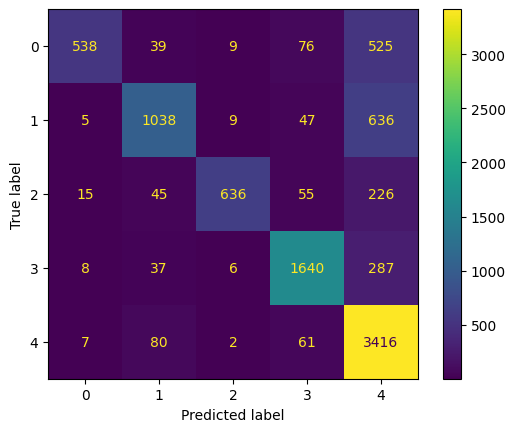

In [24]:
cm = confusion_matrix(y_test, pred_test)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()

from sklearn.metrics import classification_report
print(f"Informe de Clasificación:\n"
      f"{classification_report(y_test, pred_test)}")

In [25]:
category_df

category  category_encoded
1   BUSINESS                 0
4  PARENTING                 1
0     SPORTS                 2
2     TRAVEL                 3
3   WELLNESS                 4

## Scrapping de titulares

#### Business

In [26]:
def extract_headlines_and_category(url):
    headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'}
    response = requests.get(url, headers=headers)
    soup = BeautifulSoup(response.content, 'html.parser')

    # Extraer el nombre de la categoría
    category = soup.find('h1', class_='zone__title').get_text(strip=True)

    # Extraer los titulares
    headlines = soup.find_all('h3', class_='card__headline__text')
    headlines_text = [headline.get_text(strip=True) for headline in headlines]

    return category, headlines_text

# URL base y páginas a consultar
base_url = "https://www.huffpost.com/impact/business"
num_pages = 10  # Número de páginas a consultar (ejemplo)

# Lista para almacenar los datos
data = []

# Iterar sobre las páginas
for page_num in range(1, num_pages + 1):
    if page_num == 1:
        url = base_url
    else:
        url = f"{base_url}?page={page_num}"

    category, headlines = extract_headlines_and_category(url)

    # Agregar los titulares a la lista de datos
    for headline in headlines:
        data.append({"headline": headline, "category": category})

    # Si ya hemos recolectado más de 500 titulares, podemos detener el bucle
    if len(data) >= 500:
        break

# Crear el DataFrame
business_df = pd.DataFrame(data)

# Mostrar el DataFrame
print(business_df)

# Guardar el DataFrame en un archivo CSV
business_df.to_csv('huffpost_business_headlines.csv', index=False)

print("Archivo CSV generado correctamente.")


                                              headline  category
0    'I Want My Money Back' — People Are Sharing Th...  Business
1              ‘Roseanne’ Actor Martin Mull Dead At 80  Business
2    The Most Damaging Things You Can Say To A Peop...  Business
3    This No-Frills Amazon Underwear Has An Astonis...  Business
4    Social Media Reacts To Steve Bannon Finally Go...  Business
..                                                 ...       ...
275  The Price Of A Major Resource Is Rising Quickl...  Business
276  Mercedes Hired A Team Of Anti-Union Consultant...  Business
277   Portugal Is At War With Itself Over ‘White Gold’  Business
278  Disneyland Workers Form Union In Landslide Ele...  Business
279      Mercedes-Benz Workers In Alabama Reject Union  Business

[280 rows x 2 columns]
Archivo CSV generado correctamente.


In [27]:
# Encontrar titulares duplicados
duplicates = business_df[business_df.duplicated('headline', keep=False)]

# Mostrar los titulares duplicados junto con las categorías
print("Titulares duplicados en varias categorías:")
print(duplicates)

Titulares duplicados en varias categorías:
                                              headline  category
0    'I Want My Money Back' — People Are Sharing Th...  Business
1              ‘Roseanne’ Actor Martin Mull Dead At 80  Business
2    The Most Damaging Things You Can Say To A Peop...  Business
3    This No-Frills Amazon Underwear Has An Astonis...  Business
4    Social Media Reacts To Steve Bannon Finally Go...  Business
..                                                 ...       ...
275  The Price Of A Major Resource Is Rising Quickl...  Business
276  Mercedes Hired A Team Of Anti-Union Consultant...  Business
277   Portugal Is At War With Itself Over ‘White Gold’  Business
278  Disneyland Workers Form Union In Landslide Ele...  Business
279      Mercedes-Benz Workers In Alabama Reject Union  Business

[260 rows x 2 columns]


In [28]:
# Eliminar observaciones duplicadas, manteniendo la última aparición
business_df = business_df.drop_duplicates(keep='last')

# Mostrar el dataframe sin observaciones duplicadas
print("\nDataFrame sin observaciones duplicadas (manteniendo última aparición):")
print(business_df)
print(business_df.info())

# Guardar el DataFrame en un archivo CSV
business_df.to_csv('huffpost_business_headlines.csv', index=False)

print("Archivo CSV generado correctamente.")


DataFrame sin observaciones duplicadas (manteniendo última aparición):
                                              headline  category
40   Mercedes-Benz Is Sounding Desperate As Workers...  Business
41        REI Employees Say The Company Is ‘Panicking’  Business
42   U.S. Inflation Eased Last Month In The First S...  Business
43   Boeing Faces More Criticism Over Safety — This...  Business
50   Trader Joe's Faces Another Embarrassing Setbac...  Business
51   Volkswagen Accepts Union's Landslide Victory A...  Business
52   EU Commission President Doesn't Rule Out A Tik...  Business
53   This Is One Of The Biggest Threats To Democrac...  Business
54   The Labor Movement Just Made A Historic Breakt...  Business
55   Tesla Recalls Thousands Of Cybertrucks Over Fa...  Business
60   He Flipped Off A Trooper And Got Charged. Now ...  Business
68   This Crucial Vote Could Mark A Turning Point F...  Business
69   These Popular Beers Are Now Officially Under A...  Business
70   Trader Joe's 

#### Parents

In [29]:
def extract_headlines_and_category(url):
    headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'}
    response = requests.get(url, headers=headers)
    soup = BeautifulSoup(response.content, 'html.parser')

    # Extraer el nombre de la categoría
    category = soup.find('h1', class_='a-page__label').get_text(strip=True)

    # Extraer los titulares
    headlines = soup.find_all('h3', class_='card__headline__text')
    headlines_text = [headline.get_text(strip=True) for headline in headlines]

    return category, headlines_text

# URL base y páginas a consultar
base_url = "https://www.huffpost.com/life/parents"
num_pages = 10  # Número de páginas a consultar (ejemplo)

# Lista para almacenar los datos
data = []

# Iterar sobre las páginas
for page_num in range(1, num_pages + 1):
    if page_num == 1:
        url = base_url
    else:
        url = f"{base_url}?page={page_num}"

    category, headlines = extract_headlines_and_category(url)

    # Agregar los titulares a la lista de datos
    for headline in headlines:
        data.append({"headline": headline, "category": category})

    # Si ya hemos recolectado más de 500 titulares, podemos detener el bucle
    if len(data) >= 500:
        break

# Crear el DataFrame
parents_df = pd.DataFrame(data)

# Mostrar el DataFrame
print(parents_df)

# Guardar el DataFrame en un archivo CSV
parents_df.to_csv('huffpost_parents_headlines.csv', index=False)

print("Archivo CSV generado correctamente.")

                                              headline   category
0    Critics Clown Trump's 'IDIOTIC' Electric Plane...  Parenting
1    6 Of The Most Passive-Aggressive Phrases You’r...  Parenting
2    15 Times Celebs Made Interviewers Upset, Uncom...  Parenting
3    Opinion: Biden's Debate Disaster Changes Nothi...  Parenting
4    Adam Kinzinger Hits Back At Ex-Trump Adviser F...  Parenting
..                                                 ...        ...
385  Mindy Kaling Reveals She Gave Birth To Her Thi...  Parenting
386  The Funniest Marriage Tweets To Get You Throug...  Parenting
387  27 Products That Are Basically Champions At Wh...  Parenting
388  The Rudest Things People Do Dining Out, Accord...  Parenting
389  These Highly Rated Portable Power Stations Are...  Parenting

[390 rows x 2 columns]
Archivo CSV generado correctamente.


In [30]:
# Encontrar titulares duplicados
duplicates = parents_df[parents_df.duplicated('headline', keep=False)]

# Mostrar los titulares duplicados junto con las categorías
print("Titulares duplicados en varias categorías:")
print(duplicates)

Titulares duplicados en varias categorías:
                                              headline   category
0    Critics Clown Trump's 'IDIOTIC' Electric Plane...  Parenting
1    6 Of The Most Passive-Aggressive Phrases You’r...  Parenting
2    15 Times Celebs Made Interviewers Upset, Uncom...  Parenting
3    Opinion: Biden's Debate Disaster Changes Nothi...  Parenting
4    Adam Kinzinger Hits Back At Ex-Trump Adviser F...  Parenting
..                                                 ...        ...
385  Mindy Kaling Reveals She Gave Birth To Her Thi...  Parenting
386  The Funniest Marriage Tweets To Get You Throug...  Parenting
387  27 Products That Are Basically Champions At Wh...  Parenting
388  The Rudest Things People Do Dining Out, Accord...  Parenting
389  These Highly Rated Portable Power Stations Are...  Parenting

[388 rows x 2 columns]


In [31]:
# Eliminar observaciones duplicadas, manteniendo la última aparición
parents_df = parents_df.drop_duplicates(keep='last')

# Mostrar el dataframe sin observaciones duplicadas
print("\nDataFrame sin observaciones duplicadas (manteniendo última aparición):")
print(parents_df)
print(parents_df.info())

# Guardar el DataFrame en un archivo CSV
parents_df.to_csv('huffpost_parents_headlines.csv', index=False)

print("Archivo CSV generado correctamente.")


DataFrame sin observaciones duplicadas (manteniendo última aparición):
                                              headline   category
10   Social Media Reacts To Steve Bannon Finally Go...  Parenting
11   Would Getting Rid Of Joe Biden Be Worth The Ch...  Parenting
351  Critics Clown Trump's 'IDIOTIC' Electric Plane...  Parenting
352  15 Times Celebs Made Interviewers Upset, Uncom...  Parenting
353  6 Of The Most Passive-Aggressive Phrases You’r...  Parenting
354  Opinion: Biden's Debate Disaster Changes Nothi...  Parenting
355  Adam Kinzinger Hits Back At Ex-Trump Adviser F...  Parenting
356  Paris Hilton's Split-Second Voice Change Leave...  Parenting
358  'I Want My Money Back' — People Are Sharing Th...  Parenting
359            ‘Roseanne’ Actor Martin Mull Dead At 80  Parenting
361  He Flipped Off A Trooper And Got Charged. Now ...  Parenting
362  This No-Frills Amazon Underwear Has An Astonis...  Parenting
363  10 Ridiculous Things Child-Free People Say Abo...  Parenting
364 

#### Sports

In [32]:
def extract_headlines_and_category(url):
    headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'}
    response = requests.get(url, headers=headers)
    soup = BeautifulSoup(response.content, 'html.parser')

    # Extraer el nombre de la categoría
    category = soup.find('h1', class_='zone__title').get_text(strip=True)

    # Extraer los titulares
    headlines = soup.find_all('h3', class_='card__headline__text')
    headlines_text = [headline.get_text(strip=True) for headline in headlines]

    return category, headlines_text

# URL base y páginas a consultar
base_url = "https://www.huffpost.com/section/sports"
num_pages = 10  # Número de páginas a consultar (ejemplo)

# Lista para almacenar los datos
data = []

# Iterar sobre las páginas
for page_num in range(1, num_pages + 1):
    if page_num == 1:
        url = base_url
    else:
        url = f"{base_url}?page={page_num}"

    category, headlines = extract_headlines_and_category(url)

    # Agregar los titulares a la lista de datos
    for headline in headlines:
        data.append({"headline": headline, "category": category})

    # Si ya hemos recolectado más de 500 titulares, podemos detener el bucle
    if len(data) >= 500:
        break

# Crear el DataFrame
sports_df = pd.DataFrame(data)

# Mostrar el DataFrame
print(sports_df)

# Guardar el DataFrame en un archivo CSV
sports_df.to_csv('huffpost_sports_headlines.csv', index=False)

print("Archivo CSV generado correctamente.")

                                              headline category
0    'I Want My Money Back' — People Are Sharing Th...   Sports
1              ‘Roseanne’ Actor Martin Mull Dead At 80   Sports
2    The Most Damaging Things You Can Say To A Peop...   Sports
3    This No-Frills Amazon Underwear Has An Astonis...   Sports
4    Social Media Reacts To Steve Bannon Finally Go...   Sports
..                                                 ...      ...
274  Nebraska Regent's Plan To Put Fans' Ashes Unde...   Sports
275  Los Angeles Lakers Draft Bronny James, Son Of ...   Sports
276  U.S. Women's Soccer Legend Left Off Paris Olym...   Sports
277  New Lakers Coach Responds To Black Woman's Cla...   Sports
278  Olympic Swim Champs Tell Congress They've Lost...   Sports

[279 rows x 2 columns]
Archivo CSV generado correctamente.


In [33]:
# Encontrar titulares duplicados
duplicates = sports_df[sports_df.duplicated('headline', keep=False)]

# Mostrar los titulares duplicados junto con las categorías
print("Titulares duplicados en varias categorías:")
print(duplicates)

Titulares duplicados en varias categorías:
                                              headline category
0    'I Want My Money Back' — People Are Sharing Th...   Sports
1              ‘Roseanne’ Actor Martin Mull Dead At 80   Sports
2    The Most Damaging Things You Can Say To A Peop...   Sports
3    This No-Frills Amazon Underwear Has An Astonis...   Sports
4    Social Media Reacts To Steve Bannon Finally Go...   Sports
..                                                 ...      ...
274  Nebraska Regent's Plan To Put Fans' Ashes Unde...   Sports
275  Los Angeles Lakers Draft Bronny James, Son Of ...   Sports
276  U.S. Women's Soccer Legend Left Off Paris Olym...   Sports
277  New Lakers Coach Responds To Black Woman's Cla...   Sports
278  Olympic Swim Champs Tell Congress They've Lost...   Sports

[210 rows x 2 columns]


In [34]:
# Eliminar observaciones duplicadas, manteniendo la última aparición
sports_df = sports_df.drop_duplicates(keep='last')

# Mostrar el dataframe sin observaciones duplicadas
print("\nDataFrame sin observaciones duplicadas (manteniendo última aparición):")
print(sports_df)
print(sports_df.info())

# Guardar el DataFrame en un archivo CSV
sports_df.to_csv('huffpost_sports_headlines.csv', index=False)

print("Archivo CSV generado correctamente.")


DataFrame sin observaciones duplicadas (manteniendo última aparición):
                                              headline category
40   Olympic Gold Medalist's Appeal Denied After Tu...   Sports
41   Travis Kelce Addresses Video Of Confrontation ...   Sports
42   'Greatest Fan Grab Ever?' Dad Barehands A 415-...   Sports
43   Olympic Gold Medalist Falls In 800-Meter Trial...   Sports
50   Kendall Ellis Nearly Lost To A Porta-Potty Bef...   Sports
..                                                 ...      ...
274  Nebraska Regent's Plan To Put Fans' Ashes Unde...   Sports
275  Los Angeles Lakers Draft Bronny James, Son Of ...   Sports
276  U.S. Women's Soccer Legend Left Off Paris Olym...   Sports
277  New Lakers Coach Responds To Black Woman's Cla...   Sports
278  Olympic Swim Champs Tell Congress They've Lost...   Sports

[98 rows x 2 columns]
<class 'pandas.core.frame.DataFrame'>
Index: 98 entries, 40 to 278
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 


#### Travel

In [35]:
def extract_headlines_and_category(url):
    headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'}
    response = requests.get(url, headers=headers)
    soup = BeautifulSoup(response.content, 'html.parser')

    # Extraer el nombre de la categoría
    category = soup.find('h1', class_='a-page__label').get_text(strip=True)

    # Extraer los titulares
    headlines = soup.find_all('h3', class_='card__headline__text')
    headlines_text = [headline.get_text(strip=True) for headline in headlines]

    return category, headlines_text

# URL base y páginas a consultar
base_url = "https://www.huffpost.com/life/travel"
num_pages = 10  # Número de páginas a consultar (ejemplo)

# Lista para almacenar los datos
data = []

# Iterar sobre las páginas
for page_num in range(1, num_pages + 1):
    if page_num == 1:
        url = base_url
    else:
        url = f"{base_url}?page={page_num}"

    category, headlines = extract_headlines_and_category(url)

    # Agregar los titulares a la lista de datos
    for headline in headlines:
        data.append({"headline": headline, "category": category})

    # Si ya hemos recolectado más de 500 titulares, podemos detener el bucle
    if len(data) >= 500:
        break

# Crear el DataFrame
travel_df = pd.DataFrame(data)

# Mostrar el DataFrame
print(travel_df)

# Guardar el DataFrame en un archivo CSV
travel_df.to_csv('huffpost_travel_headlines.csv', index=False)

print("Archivo CSV generado correctamente.")

                                              headline category
0    Critics Clown Trump's 'IDIOTIC' Electric Plane...   Travel
1    15 Times Celebs Made Interviewers Upset, Uncom...   Travel
2    6 Of The Most Passive-Aggressive Phrases You’r...   Travel
3    Opinion: Biden's Debate Disaster Changes Nothi...   Travel
4    Adam Kinzinger Hits Back At Ex-Trump Adviser F...   Travel
..                                                 ...      ...
315  This Former Airline Employee's Viral Flight Ha...   Travel
316  How To Calm Anxiety During Turbulence, Accordi...   Travel
317  People Are Calling Out What Is 'Standard' In T...   Travel
318  13 Amazing Destinations For A Last-Minute Solo...   Travel
319   15 Mistakes People Make While Traveling By Train   Travel

[320 rows x 2 columns]
Archivo CSV generado correctamente.


In [36]:
# Encontrar titulares duplicados
duplicates = travel_df[travel_df.duplicated('headline', keep=False)]

# Mostrar los titulares duplicados junto con las categorías
print("Titulares duplicados en varias categorías:")
print(duplicates)

Titulares duplicados en varias categorías:
                                              headline category
0    Critics Clown Trump's 'IDIOTIC' Electric Plane...   Travel
1    15 Times Celebs Made Interviewers Upset, Uncom...   Travel
2    6 Of The Most Passive-Aggressive Phrases You’r...   Travel
3    Opinion: Biden's Debate Disaster Changes Nothi...   Travel
4    Adam Kinzinger Hits Back At Ex-Trump Adviser F...   Travel
..                                                 ...      ...
315  This Former Airline Employee's Viral Flight Ha...   Travel
316  How To Calm Anxiety During Turbulence, Accordi...   Travel
317  People Are Calling Out What Is 'Standard' In T...   Travel
318  13 Amazing Destinations For A Last-Minute Solo...   Travel
319   15 Mistakes People Make While Traveling By Train   Travel

[320 rows x 2 columns]


In [37]:
# Eliminar observaciones duplicadas, manteniendo la última aparición
travel_df = travel_df.drop_duplicates(keep='last')

# Mostrar el dataframe sin observaciones duplicadas
print("\nDataFrame sin observaciones duplicadas (manteniendo última aparición):")
print(travel_df)
print(travel_df.info())

# Guardar el DataFrame en un archivo CSV
travel_df.to_csv('huffpost_travel_headlines.csv', index=False)

print("Archivo CSV generado correctamente.")


DataFrame sin observaciones duplicadas (manteniendo última aparición):
                                              headline category
288  Critics Clown Trump's 'IDIOTIC' Electric Plane...   Travel
289  15 Times Celebs Made Interviewers Upset, Uncom...   Travel
290  6 Of The Most Passive-Aggressive Phrases You’r...   Travel
291  Opinion: Biden's Debate Disaster Changes Nothi...   Travel
292  Adam Kinzinger Hits Back At Ex-Trump Adviser F...   Travel
293  Paris Hilton's Split-Second Voice Change Leave...   Travel
294  Experts On Aging Reveal The 5 Major Habits Tha...   Travel
295  'I Want My Money Back' — People Are Sharing Th...   Travel
296            ‘Roseanne’ Actor Martin Mull Dead At 80   Travel
297  The Most Damaging Things You Can Say To A Peop...   Travel
298  He Flipped Off A Trooper And Got Charged. Now ...   Travel
299  This No-Frills Amazon Underwear Has An Astonis...   Travel
300  The 1 Thing Flight Attendants Wish Passengers ...   Travel
301  Is It Ever OK To Recline Yo

#### Wellness

In [38]:
def extract_headlines_and_category(url):
    headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'}
    response = requests.get(url, headers=headers)
    soup = BeautifulSoup(response.content, 'html.parser')

    # Extraer el nombre de la categoría
    category = soup.find('h1', class_='a-page__label').get_text(strip=True)

    # Extraer los titulares
    headlines = soup.find_all('h3', class_='card__headline__text')
    headlines_text = [headline.get_text(strip=True) for headline in headlines]

    return category, headlines_text

# URL base y páginas a consultar
base_url = "https://www.huffpost.com/life/healthy-living"
num_pages = 10  # Número de páginas a consultar (ejemplo)

# Lista para almacenar los datos
data = []

# Iterar sobre las páginas
for page_num in range(1, num_pages + 1):
    if page_num == 1:
        url = base_url
    else:
        url = f"{base_url}?page={page_num}"

    category, headlines = extract_headlines_and_category(url)

    # Agregar los titulares a la lista de datos
    for headline in headlines:
        data.append({"headline": headline, "category": category})

    # Si ya hemos recolectado más de 500 titulares, podemos detener el bucle
    if len(data) >= 500:
        break

# Crear el DataFrame
wellness_df = pd.DataFrame(data)

# Mostrar el DataFrame
print(wellness_df)

# Guardar el DataFrame en un archivo CSV
wellness_df.to_csv('huffpost_wellness_1_headlines.csv', index=False)

print("Archivo CSV generado correctamente.")

                                              headline  category
0    Critics Clown Trump's 'IDIOTIC' Electric Plane...  Wellness
1    6 Of The Most Passive-Aggressive Phrases You’r...  Wellness
2    15 Times Celebs Made Interviewers Upset, Uncom...  Wellness
3    Opinion: Biden's Debate Disaster Changes Nothi...  Wellness
4    Adam Kinzinger Hits Back At Ex-Trump Adviser F...  Wellness
..                                                 ...       ...
415  5 Sneaky Signs Of Appendicitis You Shouldn't I...  Wellness
416  6 Seemingly ‘Harmless’ Habits That Are Prematu...  Wellness
417  Stop Listening To These 5 Pieces Of Advice Tha...  Wellness
418  Feeling Anxious? Therapists Say This 1 Thing C...  Wellness
419  Here's The Real Reason Women Have That Little ...  Wellness

[420 rows x 2 columns]
Archivo CSV generado correctamente.


In [39]:
# Encontrar titulares duplicados
duplicates = wellness_df[wellness_df.duplicated('headline', keep=False)]

# Mostrar los titulares duplicados junto con las categorías
print("Titulares duplicados en varias categorías:")
print(duplicates)

Titulares duplicados en varias categorías:
                                              headline  category
0    Critics Clown Trump's 'IDIOTIC' Electric Plane...  Wellness
1    6 Of The Most Passive-Aggressive Phrases You’r...  Wellness
2    15 Times Celebs Made Interviewers Upset, Uncom...  Wellness
3    Opinion: Biden's Debate Disaster Changes Nothi...  Wellness
4    Adam Kinzinger Hits Back At Ex-Trump Adviser F...  Wellness
..                                                 ...       ...
415  5 Sneaky Signs Of Appendicitis You Shouldn't I...  Wellness
416  6 Seemingly ‘Harmless’ Habits That Are Prematu...  Wellness
417  Stop Listening To These 5 Pieces Of Advice Tha...  Wellness
418  Feeling Anxious? Therapists Say This 1 Thing C...  Wellness
419  Here's The Real Reason Women Have That Little ...  Wellness

[418 rows x 2 columns]


In [40]:
# Eliminar observaciones duplicadas, manteniendo la última aparición
wellness_df = wellness_df.drop_duplicates(keep='last')

# Mostrar el dataframe sin observaciones duplicadas
print("\nDataFrame sin observaciones duplicadas (manteniendo última aparición):")
print(wellness_df)
print(wellness_df.info())

# Guardar el DataFrame en un archivo CSV
wellness_df.to_csv('huffpost_wellness_headlines.csv', index=False)

print("Archivo CSV generado correctamente.")


DataFrame sin observaciones duplicadas (manteniendo última aparición):
                                              headline  category
10   Social Media Reacts To Steve Bannon Finally Go...  Wellness
11   Would Getting Rid Of Joe Biden Be Worth The Ch...  Wellness
378  Critics Clown Trump's 'IDIOTIC' Electric Plane...  Wellness
379  15 Times Celebs Made Interviewers Upset, Uncom...  Wellness
380  6 Of The Most Passive-Aggressive Phrases You’r...  Wellness
381  Opinion: Biden's Debate Disaster Changes Nothi...  Wellness
382  Adam Kinzinger Hits Back At Ex-Trump Adviser F...  Wellness
383  Paris Hilton's Split-Second Voice Change Leave...  Wellness
385  'I Want My Money Back' — People Are Sharing Th...  Wellness
386            ‘Roseanne’ Actor Martin Mull Dead At 80  Wellness
387  The Most Damaging Things You Can Say To A Peop...  Wellness
388  He Flipped Off A Trooper And Got Charged. Now ...  Wellness
389  This No-Frills Amazon Underwear Has An Astonis...  Wellness
390  New Study Unc

In [41]:
dfs = [business_df, parents_df, sports_df, travel_df, wellness_df]

# Concatenar los DataFrames
df_new = pd.concat(dfs, axis=0, ignore_index=True)

# Guardar el DataFrame en un archivo CSV
df_new.to_csv('huffpost_df_new_headlines.csv', index=False)

print("Archivo CSV generado correctamente.")

Archivo CSV generado correctamente.


In [42]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262 entries, 0 to 261
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   headline  262 non-null    object
 1   category  262 non-null    object
dtypes: object(2)
memory usage: 4.2+ KB


In [43]:
# Encontrar titulares duplicados
duplicates = df_new[df_new.duplicated('headline', keep=False)]

# Mostrar los titulares duplicados junto con las categorías
print("Titulares duplicados en varias categorías:")
print(duplicates)

Titulares duplicados en varias categorías:
                                              headline  category
10   He Flipped Off A Trooper And Got Charged. Now ...  Business
15   Paris Hilton's Split-Second Voice Change Leave...  Business
22   'I Want My Money Back' — People Are Sharing Th...  Business
23             ‘Roseanne’ Actor Martin Mull Dead At 80  Business
24   The Most Damaging Things You Can Say To A Peop...  Business
..                                                 ...       ...
231  This No-Frills Amazon Underwear Has An Astonis...  Wellness
232  New Study Uncovers An Alarming Consequence Of ...  Wellness
233  I Ended Up In The ER During A Vacation In Spai...  Wellness
242  Experts On Aging Reveal The 5 Major Habits Tha...  Wellness
245  7 Signs You Grew Up With Emotionally Immature ...  Wellness

[88 rows x 2 columns]


In [44]:
df_new.head()

headline  category
0  Mercedes-Benz Is Sounding Desperate As Workers...  Business
1       REI Employees Say The Company Is ‘Panicking’  Business
2  U.S. Inflation Eased Last Month In The First S...  Business
3  Boeing Faces More Criticism Over Safety — This...  Business
4  Trader Joe's Faces Another Embarrassing Setbac...  Business

In [45]:
# Encontrar titulares duplicados
duplicates = df_new[df_new.duplicated('headline', keep=False)]

# Mostrar los titulares duplicados junto con las categorías
print("Titulares duplicados en varias categorías:")
print(duplicates)

Titulares duplicados en varias categorías:
                                              headline  category
10   He Flipped Off A Trooper And Got Charged. Now ...  Business
15   Paris Hilton's Split-Second Voice Change Leave...  Business
22   'I Want My Money Back' — People Are Sharing Th...  Business
23             ‘Roseanne’ Actor Martin Mull Dead At 80  Business
24   The Most Damaging Things You Can Say To A Peop...  Business
..                                                 ...       ...
231  This No-Frills Amazon Underwear Has An Astonis...  Wellness
232  New Study Uncovers An Alarming Consequence Of ...  Wellness
233  I Ended Up In The ER During A Vacation In Spai...  Wellness
242  Experts On Aging Reveal The 5 Major Habits Tha...  Wellness
245  7 Signs You Grew Up With Emotionally Immature ...  Wellness

[88 rows x 2 columns]


In [46]:
# Eliminar observaciones duplicadas basadas solo en la columna 'headline', manteniendo la última aparición
df_new_limpio = df_new.drop_duplicates(subset=['headline'], keep= False)

# Mostrar el dataframe sin observaciones duplicadas
print("\nDataFrame sin observaciones duplicadas (basado en 'headline':")
print(df_new_limpio)
print(df_new_limpio.info())

# Guardar el DataFrame en un archivo CSV
df_new_limpio.to_csv('huffpost_df_new__limpio_headlines.csv', index=False)

print("Archivo CSV generado correctamente.")



DataFrame sin observaciones duplicadas (basado en 'headline':
                                              headline  category
0    Mercedes-Benz Is Sounding Desperate As Workers...  Business
1         REI Employees Say The Company Is ‘Panicking’  Business
2    U.S. Inflation Eased Last Month In The First S...  Business
3    Boeing Faces More Criticism Over Safety — This...  Business
4    Trader Joe's Faces Another Embarrassing Setbac...  Business
..                                                 ...       ...
257  5 Sneaky Signs Of Appendicitis You Shouldn't I...  Wellness
258  6 Seemingly ‘Harmless’ Habits That Are Prematu...  Wellness
259  Stop Listening To These 5 Pieces Of Advice Tha...  Wellness
260  Feeling Anxious? Therapists Say This 1 Thing C...  Wellness
261  Here's The Real Reason Women Have That Little ...  Wellness

[174 rows x 2 columns]
<class 'pandas.core.frame.DataFrame'>
Index: 174 entries, 0 to 261
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dty

In [47]:
# Contar el número de titulares por categoría
headline_counts = df_new_limpio['category'].value_counts()

# Mostrar el número de titulares por categoría
print("\nNúmero de titulares por categoría:")
print(headline_counts)


Número de titulares por categoría:
category
Sports       78
Business     30
Wellness     26
Parenting    21
Travel       19
Name: count, dtype: int64


In [48]:
# Mostrar los valores únicos de la variable 'category'
unique_categories = df_new_limpio['category'].unique()
print("\nValores únicos de la variable 'category':")
print(unique_categories)


Valores únicos de la variable 'category':
['Business' 'Parenting' 'Sports' 'Travel' 'Wellness']


In [49]:
# Ahora obtener los valores nulos por variable
valores_nulos = df_new_limpio.isnull().sum()

print("Valores nulos por variable:")
print(valores_nulos)

Valores nulos por variable:
headline    0
category    0
dtype: int64


In [50]:
# Crear un diccionario de mapeo para 'category' a 'category_encoded'
category_mapping = {
    "Business": 0,
    "Parenting": 1,
    "Sports": 2,
    "Travel": 3,
    "Wellness": 4
}

# Agregar la columna 'category_encoded' al DataFrame
df_new_limpio['category_encoded'] = df_new_limpio['category'].map(category_mapping)

# Mostrar el DataFrame con la nueva columna
print("\nDataFrame con la columna 'category_encoded':")
df_new_limpio.head()


DataFrame con la columna 'category_encoded':


headline  category  \
0  Mercedes-Benz Is Sounding Desperate As Workers...  Business   
1       REI Employees Say The Company Is ‘Panicking’  Business   
2  U.S. Inflation Eased Last Month In The First S...  Business   
3  Boeing Faces More Criticism Over Safety — This...  Business   
4  Trader Joe's Faces Another Embarrassing Setbac...  Business   

   category_encoded  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0

In [51]:
# Selecciona las columnas 'category' y 'category_encoded', elimina duplicados y resetea el índice
category_df_new = df_new_limpio[['category', 'category_encoded']].drop_duplicates().reset_index(drop=True)

# Ordena el DataFrame por 'category_encoded' de menor a mayor
category_df_new = category_df.sort_values(by='category_encoded')

# Muestra el DataFrame ordenado
category_df_new

category  category_encoded
1   BUSINESS                 0
4  PARENTING                 1
0     SPORTS                 2
2     TRAVEL                 3
3   WELLNESS                 4

## Vectorización de titulares extraídos

In [52]:
vectorizer = TfidfVectorizer(stop_words=stopwords.words('english'))
vect = vectorizer.fit_transform(df_new_limpio["headline"].values)

In [53]:
vect.todense()
vocab = np.sort(list(vectorizer.vocabulary_.keys()))
df_vect = pd.DataFrame(vect.todense(), columns = vocab)
print(df_vect.shape)
df_vect.head()

(174, 920)


000   10  100   13   15   18  18th  1954     2024   25   27   30   32   33  \
0  0.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0  0.00000  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0  0.00000  0.0  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0  0.32529  0.0  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0  0.00000  0.0  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0  0.00000  0.0  0.0  0.0  0.0  0.0   

    40  400  40s  415  4th  800   93  aaron  accelerator  accepts  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0    0.0          0.0      0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0    0.0          0.0      0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0    0.0          0.0      0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0    0.0          0.0      0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0    0.0          0.0      0.0   

   accessories  accident  according  accused  acl  activist  activity  actual  \
0          0.0       0.0        0.0      0.0  0.0       0.0       0.0     0.0   
1          0.0       0.0        0.0      0.0  0.0       0.0       0.0     0.0   
2          0.0       0.0        0.0      0.0  0.0       0.0       0.0     0.0   
3          0.0       0.0        0.0      0.0  0.0       0.0       0.0     0.0   
4          0.0       0.0        0.0      0.0  0.0       0.0       0.0     0.0   

   actually  addresses  advice  affected  age  aging  agree  ahead  airline  \
0       0.0        0.0     0.0       0.0  0.0    0.0    0.0    0.0      0.0   
1       0.0        0.0     0.0       0.0  0.0    0.0    0.0    0.0      0.0   
2       0.0        0.0     0.0       0.0  0.0    0.0    0.0    0.0      0.0   
3       0.0        0.0     0.0       0.0  0.0    0.0    0.0    0.0      0.0   
4       0.0        0.0     0.0       0.0  0.0    0.0    0.0    0.0      0.0   

   airplane  alabama  alarming  alarms  alleged  allegedly  allergies  always  \
0       0.0      0.0       0.0     0.0      0.0        0.0        0.0     0.0   
1       0.0      0.0       0.0     0.0      0.0        0.0        0.0     0.0   
2       0.0      0.0       0.0     0.0      0.0        0.0        0.0     0.0   
3       0.0      0.0       0.0     0.0      0.0        0.0        0.0     0.0   
4       0.0      0.0       0.0     0.0      0.0        0.0        0.0     0.0   

   amazing  amazon  americans  amid  angeles  animal   another  anti  anxiety  \
0      0.0     0.0        0.0   0.0      0.0     0.0  0.000000   0.0      0.0   
1      0.0     0.0        0.0   0.0      0.0     0.0  0.000000   0.0      0.0   
2      0.0     0.0        0.0   0.0      0.0     0.0  0.000000   0.0      0.0   
3      0.0     0.0        0.0   0.0      0.0     0.0  0.000000   0.0      0.0   
4      0.0     0.0        0.0   0.0      0.0     0.0  0.365703   0.0      0.0   

   anxious  appeal  appendicitis  arrested  arthritis  ashes  asked  \
0      0.0     0.0           0.0       0.0        0.0    0.0    0.0   
1      0.0     0.0           0.0       0.0        0.0    0.0    0.0   
2      0.0     0.0           0.0       0.0        0.0    0.0    0.0   
3      0.0     0.0           0.0       0.0        0.0    0.0    0.0   
4      0.0     0.0           0.0       0.0        0.0    0.0    0.0   

   assaulting  athletes  attendants  aussie  awkward  ayesha  baby  back  \
0         0.0       0.0         0.0     0.0      0.0     0.0   0.0   0.0   
1         0.0       0.0         0.0     0.0      0.0     0.0   0.0   0.0   
2         0.0       0.0         0.0     0.0      0.0     0.0   0.0   0.0   
3         0.0       0.0         0.0     0.0      0.0     0.0   0.0   0.0   
4         0.0       0.0         0.0     0.0      0.0     0.0   0.0   0.0   

   backflip  backs  backswing  bad  ball  ban  bans  barehands  barkley  \
0       0.0    0.0        0.0  0.0   0.0  0.0   0.0        0.0      0.0   
1       0.0    0.0        0.0  0.0   0.0  0.0   0.0        0.0      0.0   
2       0.0    0.0        0.0  0.0   0.0  0.0   0.0     

## Realización de predicciones sobre los nuevos titulares

In [54]:
# Crear el vectorizador
vectorizer = TfidfVectorizer(stop_words=stopwords.words('english'))

# Transformar los titulares en vectores
X = vectorizer.fit_transform(huffpost_df['headline'].values)
y = huffpost_df['category_encoded'].values

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo
mnb_model_alfa_1 = MultinomialNB(alpha=1.0)
mnb_model_alfa_1.fit(X_train, y_train)

# Hacer predicciones y evaluar el modelo
print("Precisión sobre los datos de entrenamiento: {:.2f}".format(100.0 * mnb_model_alfa_1.score(X_train, y_train)))
print("Precisión sobre los datos de test: {:.2f}".format(100.0 * mnb_model_alfa_1.score(X_test, y_test)))

Precisión sobre los datos de entrenamiento: 83.63
Precisión sobre los datos de test: 76.48


In [55]:
# Transformar los nuevos titulares en vectores usando el mismo vectorizador
X_new = vectorizer.transform(df_new_limpio['headline'].values)
y_new = df_new_limpio['category_encoded'].values

# Hacer predicciones con los datos nuevos
predicted_class = mnb_model_alfa_1.predict(X_new)

# Evaluar la precisión sobre los datos nuevos
print("Precisión sobre los datos nuevos: {:.2f}".format(100.0 * mnb_model_alfa_1.score(X_new, y_new)))

Precisión sobre los datos nuevos: 62.64



Informe de clasificación:
              precision    recall  f1-score   support

           0       1.00      0.50      0.67        30
           1       0.59      0.48      0.53        21
           2       0.98      0.62      0.76        78
           3       0.65      0.58      0.61        19
           4       0.33      0.96      0.49        26

    accuracy                           0.63       174
   macro avg       0.71      0.63      0.61       174
weighted avg       0.80      0.63      0.66       174



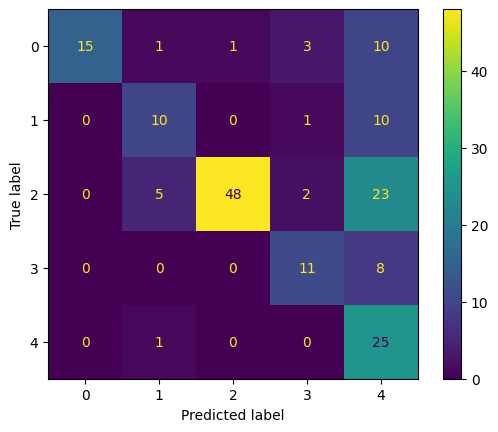

In [56]:
cm = confusion_matrix(y_new, predicted_class)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()

# Informe de clasificación detallado
class_report = classification_report(y_new, predicted_class)
print("\nInforme de clasificación:")
print(class_report)